# What is Categorical Data?

    What is categorical data?
        Since we are going to be working on categorical variables in this article, here is a quick refresher on the same with a couple of examples. Categorical variables are usually represented as ‘strings’ or          ‘categories’ and are finite in number. Here are a few examples:

1. The city where a person lives: Delhi, Mumbai, Ahmedabad, Bangalore, etc.
2. The department a person works in: Finance, Human resources, IT, Production.
3. The highest degree a person has: High school, Diploma, Bachelors, Masters, PhD.
4. The grades of a student:  A+, A, B+, B, B- etc.
5. In the above examples, the variables only have definite possible values. Further, we can see there are two kinds of categorical data


    1. Ordinal Data: The categories have an inherent order
    2. Nominal Data: The categories do not have an inherent order
    
    In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided. Like in the above example the highest degree a person possesses, gives vital information about his qualification. The degree is an important feature to decide whether a person is suitable for a post or not.

    While encoding Nominal data, we have to consider the presence or absence of a feature. In such a case, no notion of order is present. For example, the city a person lives in. For the data, it is important to retain where a person lives. Here, We do not have any order or sequence. It is equal if a person lives in Delhi or Bangalore.

## Note:- 
       Important thing to remember is always determine what type of categorical variable is (ordinal or nominal). On the basis of that only we can encode that variable.

## Encoding of categorical data

### Types of encoding are:-
1. Label Encoding or Ordinal Encoding
2. One hot Encoding
3. Dummy Encoding
4. Effect Encoding
5. Binary Encoding
6. BaseN Encoding
7. Hash Encoding
8. Target Encoding

### Label Encoding and Ordinal Encoding
    We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

    In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.
    
    Package used for Label Encoding is category_encoder and sklearn.preprocessing.ordinalencoder and sklearn.preprocessing.labelencoder

### Difference between label encoder and ordinal encoder
    The only different is that LabelEncoder returned an array, while OrdinalEncoder returned each element inside an array of arrays.

In [2]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 80 kB 327 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [35]:
#### Ordinal Encoding
import category_encoders as ce
import pandas as pd
train_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}])

#Original data
train_df

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [36]:
#fit and transform train data 
df_train_transformed = encoder.fit_transform(train_df)
df_train_transformed

/home/himanshugoyal/.local/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Degree
0,1
1,4
2,2
3,3
4,3
5,4
6,5
7,1
8,1


In [40]:
# Or
# Sklearn library also has ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
oen = OrdinalEncoder()
train_df['Degree_with_oridnal_encoder'] = oen.fit_transform(train_df.Degree.values.reshape(-1,1))
train_df

,Degree,Degree_with_label_encoder,Degree_with_oridnal_encoder
0,High school,2,2.0
1,Masters,3,3.0
2,Diploma,1,1.0
3,Bachelors,0,0.0
4,Bachelors,0,0.0
5,Masters,3,3.0
6,Phd,4,4.0
7,High school,2,2.0
8,High school,2,2.0


In [42]:
# Ordinal encoding with manually set values
degree_dict  = {'High school': 0,
                'Diploma': 1,
                'Bachelors': 2,
                'Masters': 3,
                'Phd': 4}
train_df['degree_ordinal_encoder_manual'] = train_df.Degree.map(degree_dict)
train_df

,Degree,Degree_with_label_encoder,Degree_with_oridnal_encoder,degree_ordinal_encoder_manual
0,High school,2,2.0,0
1,Masters,3,3.0,3
2,Diploma,1,1.0,1
3,Bachelors,0,0.0,2
4,Bachelors,0,0.0,2
5,Masters,3,3.0,3
6,Phd,4,4.0,4
7,High school,2,2.0,0
8,High school,2,2.0,0


In [39]:
### Label encoder
from sklearn.preprocessing import LabelEncoder
train_df['Degree_with_label_encoder'] = LabelEncoder().fit_transform(train_df.Degree)
train_df

,Degree,Degree_with_label_encoder
0,High school,2
1,Masters,3
2,Diploma,1
3,Bachelors,0
4,Bachelors,0
5,Masters,3
6,Phd,4
7,High school,2
8,High school,2


### One Hot Encoding
    We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

    These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable. This might sound complicated. Let us take an example to understand this better. Suppose we have a dataset with a category animal, having different animals like Dog, Cat, Sheep, Cow, Lion. Now we have to one-hot encode this data.

In [19]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':[
'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
]})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [9]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

/home/himanshugoyal/.local/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,City_Delhi,City_Mumbai,City_Hydrabad,City_Chennai,City_Bangalore
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0


In [28]:
# Or
# Sklearn library also has onehotencoding

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data.City.values.reshape(-1,1)).toarray()
pde_onehot = pd.DataFrame(ohe, columns=['A','B','C','D','E'])
pde_onehot

,A,B,C,D,E
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0


### Dummy Encoding
    Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

    To understand this better let’s see the image below. Here we are coding the same data using both one-hot encoding and dummy encoding techniques. While one-hot uses 3 variables to represent the data whereas dummy encoding uses 2 variables to code 3 categories.

In [11]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']})

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [13]:
# encode the data
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded
# Here using drop_first  argument, we are representing the first label Bangalore using 0.

,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,0,0
5,0,1,0,0
6,0,0,1,0


### Drawbacks of one hot encoding and dummy encoding
    One hot encoder and dummy encoder are two powerful and effective encoding schemes. They are also very popular among the data scientists, But may not be as effective when-

   1. A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
   2. If we have multiple categorical features in the dataset similar situation will occur and again we will end to have several binary features each representing the categorical feature and their multiple categories e.g a dataset having 10 or more categorical columns.
    
    In both the above cases, these two encoding schemes introduce sparsity in the dataset i.e several columns having 0s and a few of them having 1s. In other words, it creates multiple dummy features in the dataset without adding much information.

    Also, they might lead to a Dummy variable trap. It is a phenomenon where features are highly correlated. That means using the other variables, we can easily predict the value of a variable.

    Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive. Further, while using tree-based models these encodings are not an optimum choice.

### Effect Encoding:
    This encoding technique is also known as Deviation Encoding or Sum Encoding. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.

    The row containing only 0s in dummy encoding is encoded as -1 in effect encoding.  In the dummy encoding example, the city Bangalore at index 4  was encoded as 0000. Whereas in effect encoding it is represented by -1-1-1-1.

In [16]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']})
encoder=ce.sum_coding.SumEncoder(cols='City',verbose=False,)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [17]:
encoder.fit_transform(data)


/home/himanshugoyal/.local/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,City_0,City_1,City_2,City_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,-1.0,-1.0,-1.0,-1.0
5,1,1.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0


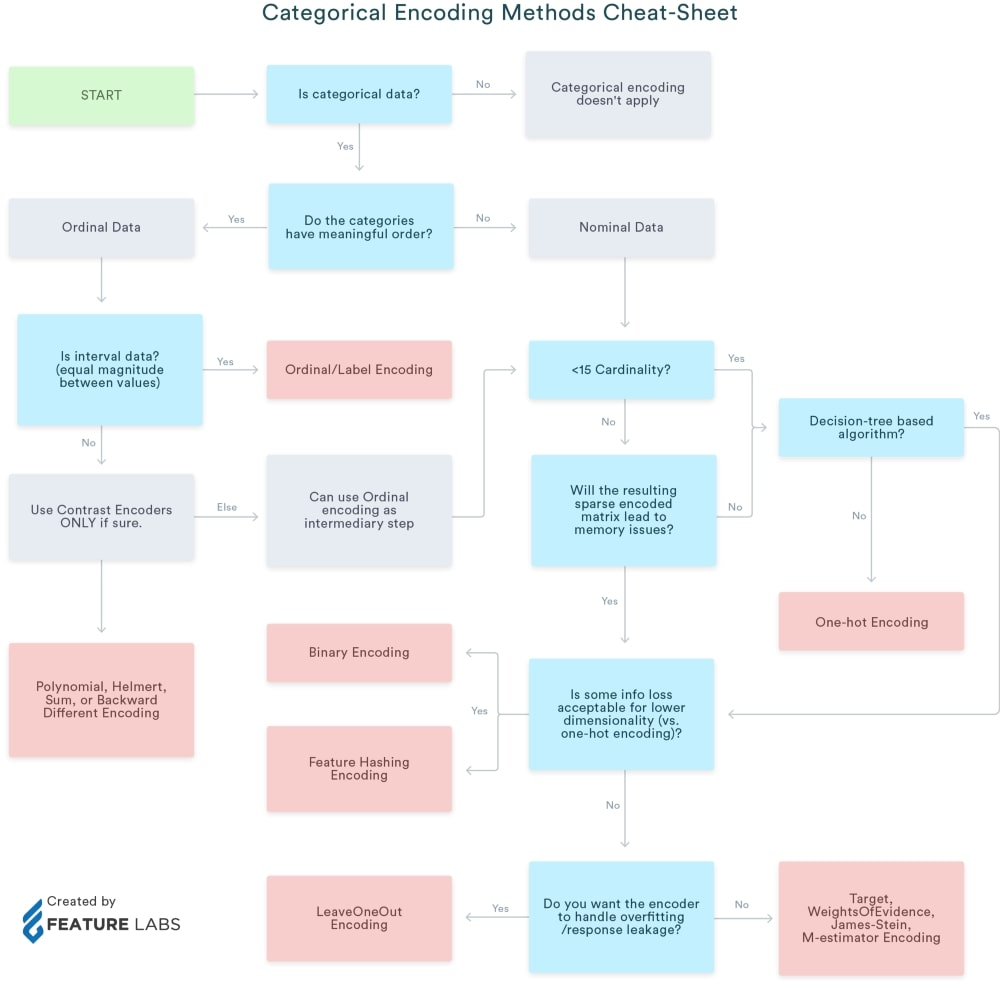

In [1]:
# Qualitative data analysis
# Plot of categorical data
# Chi Square test
